## Observations and Insights 

Observations:

The data indicates that there were more mice treated with Ramicane and Capomulin than all other drug treatments.  Tumor sizes
at the end of the experiment were smaller for those mice treated with Ramicane and Capomulin.  The data also suggests that
tumor size tends to be larger in mice with higher weight.

In [107]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_mice = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
# # Display the data table for preview
merged_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
merged_mice["Mouse ID"].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped_mice = merged_mice.groupby(["Mouse ID", "Timepoint"])
duped_mice = grouped_mice.count()
#duped_mice
duped_mice_count = duped_mice.loc[(duped_mice["Sex"] != 1)]
duped_mice_count

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     0                     2    2           2           2   
         5                     2    2           2           2   
         10                    2    2           2           2   
         15                    2    2           2           2   
         20                    2    2           2           2   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     0                           2                 2  
         5                           2                 2  
         10                          2                 2  
         15                          2                 2  
         20                          2                 2

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#duped_mice_count.info()
duped_mouse = merged_mice.loc[merged_mice["Mouse ID"] == "g989"]
duped_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_dup = duped_mouse.drop_duplicates(subset="Timepoint", keep="first")
#drop_dup

no_duped_mouse = merged_mice.drop(merged_mice[merged_mice["Mouse ID"] == "g989"].index)
no_duped_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
no_duped_mouse["Mouse ID"].count()

# check_mouse = no_duped_mouse.loc[clean_df["Mouse ID"] == "g989"]
# check_mouse

1880

## Summary Statistics

In [7]:
by_drug = no_duped_mouse.groupby(["Drug Regimen"])
by_drug.count()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = by_drug.mean()["Tumor Volume (mm3)"]
tumor_median = by_drug.median()["Tumor Volume (mm3)"]
tumor_var = by_drug.var()["Tumor Volume (mm3)"]
tumor_std = by_drug.std()["Tumor Volume (mm3)"]
tumor_SEM = by_drug.sem()["Tumor Volume (mm3)"]
summary_df = pd.DataFrame({"Mean" : tumor_mean, "Median" : tumor_median, "Variance" : tumor_var, "Standard Deviation" : tumor_std, "SEM" : tumor_SEM})
summary_df.head()
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#by_drug[["Drug Regimen", "Tumor Volume (mm3)"]].describe()
summary2_df = by_drug.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
summary2_df

# This method produces everything in a single groupby function

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment')

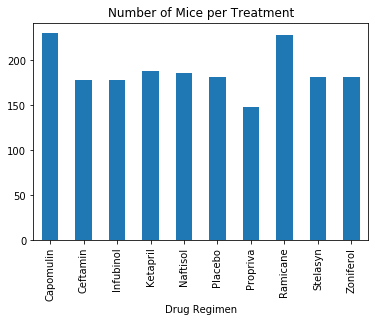

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_per_drug = by_drug["Mouse ID"].count()
mice_per_drug.plot(kind="bar")
plt.title("Number of Mice per Treatment")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

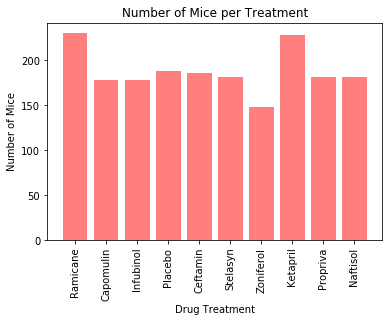

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drugs = (merged_mice["Drug Regimen"].unique())
mice = (by_drug["Mouse ID"].count())
x_axis = np.arange(len(drugs))
plt.bar(drugs, mice, color="r", alpha=0.5, align="center")
plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Treatment")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

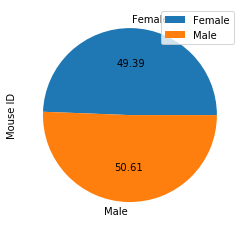

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = merged_mice.groupby(["Sex"])
mice_counts = mice_gender.count()["Mouse ID"]

mice_counts.plot.pie(legend=True, autopct='%.2f')



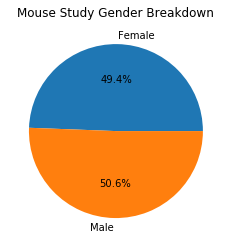

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_counts, labels=mice_counts.index, autopct='%1.1f%%')
plt.title("Mouse Study Gender Breakdown")
plt.show()
# mice_counts

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#four_drugs_bool = no_duped_mouse["Drug Regimen"] == "Capomulin" or "Ramicane" or "Infubinol" or "Ceftamin")
four_drugs = no_duped_mouse.loc[no_duped_mouse["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
four_drugs

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = four_drugs.groupby(["Mouse ID"])
mouse_max = pd.DataFrame(max_timepoint["Timepoint"].max())
mouse_max

# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_timepoint = pd.merge(mouse_max, four_drugs, how="left", on=["Mouse ID", "Timepoint"])
merged_timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [55]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = merged_timepoint["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = merged_timepoint["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
capomulin = merged_timepoint.loc[merged_timepoint["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
ramicane = merged_timepoint.loc[merged_timepoint["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
infubinol = merged_timepoint.loc[merged_timepoint["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
ceftamin = merged_timepoint.loc[merged_timepoint["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]    

    # add subset 
drug_volumes = [capomulin, ramicane, infubinol, ceftamin]    
    
    # Determine outliers using upper and lower bounds
outlier_volume = (drug_volumes < lower_bound) | (drug_volumes > upper_bound)
outlier_volume 
    

The lower quartile of tumor volume is: 37.187743802499995
The upper quartile of tumor volume is: 59.930261755000004
The interquartile range of tumor volume is: 22.74251795250001
The the median of tumor volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False]])

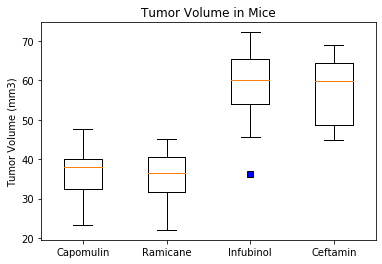

In [115]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume in Mice")
ax1.set_ylabel("Tumor Volume (mm3)")
blue_square = dict(markerfacecolor='b', marker='s')
ax1.boxplot(drug_volumes, flierprops=blue_square, labels=treatments)
plt.show()


## Line and Scatter Plots

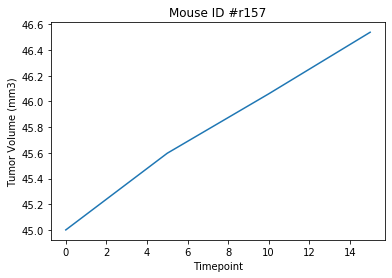

In [98]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#capomulin
# cap_mouse_list = no_duped_mouse.loc[no_duped_mouse["Drug Regimen"] == "Capomulin"]
# cap_mouse_list
# r157

cap_mouse = no_duped_mouse[(no_duped_mouse["Mouse ID"]=="r157")]
#cap_mouse

plt.plot(cap_mouse["Timepoint"], cap_mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse ID #r157")
plt.show()

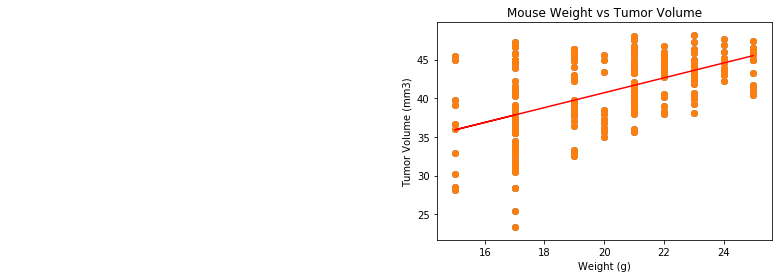

In [113]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_mice = no_duped_mouse[(no_duped_mouse["Drug Regimen"]=="Capomulin")]
#cap_mice
plt.scatter(cap_mice["Weight (g)"], cap_mice["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs Tumor Volume")
x_values = cap_mice["Weight (g)"]
y_values = cap_mice["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.show()

## Correlation and Regression

In [110]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#cap_mice
mouse_weight = cap_mice.iloc[:,4]
tumor_vol = cap_mice.iloc[:,6]
correlation = st.pearsonr(mouse_weight,tumor_vol)
print(correlation)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(0.525699555207717, 9.605446629502006e-18)
The correlation between both factors is 0.53
